In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

In [275]:
data = pd.read_csv('data/data.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [276]:
y = data['diagnosis']
x = data.drop(['diagnosis'], axis=1)

In [277]:
y.unique()

array(['M', 'B'], dtype=object)

Benign Count:  357
Malignant Count:  212


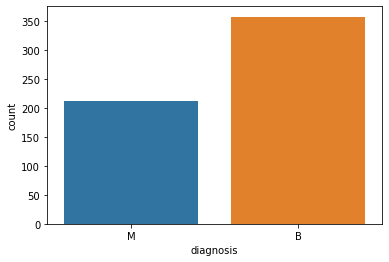

In [278]:
B, M = y.value_counts()

sns.countplot(y)
print("Benign Count: ", B)
print("Malignant Count: ", M)

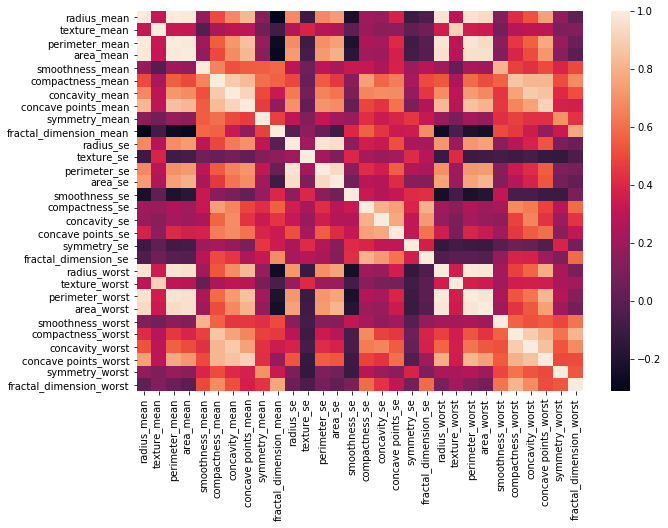

In [279]:
plt.figure(figsize=(10,7))
sns.heatmap(data[data.columns[0:]].corr())

In [280]:
## Split the Data into training and test set
y = y.apply(lambda q: 0 if q == 'B' else 1)
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(y.unique())

[1 0]


# Plotting

### Learning Curve

In [281]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(classifier, x, y, title):
    n = len(y)
    train_size = np.linspace(0.1, 1.0, 20)
    
    _, train_scores, test_scores = learning_curve(classifier, x, y, scoring='f1', train_sizes=train_size, cv=5)
    
    plt.figure()
    plt.plot(train_size, np.mean(train_scores, axis=1), 'o-', label="Training Score")
    plt.plot(train_size, np.mean(test_scores, axis=1), 'o-', label="Cross-Validation Score")
    plt.title(title)
    plt.xlabel("Fraction of DataSet")
    plt.ylabel("Classification Score")
    plt.legend(loc="best")
    plt.grid(axis='both')
    
    plt.savefig('SVMLineartuned.png')

### Validation Curve

In [282]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(classifier, x, y, p, p_range, cv, title, attribute):
    train, test = validation_curve(classifier, x, y, param_name=p, param_range=p_range, cv=cv)
    
    title = 'Validation Curve for ' + title
    
    plt.figure(figsize=(7,5))
    plt.plot(p_range, np.mean(train, axis=1), label='Training Score')
    plt.plot(p_range, np.mean(test, axis=1), label='CV Score')
    plt.title(title)
    plt.xlabel(attribute)
    plt.ylabel('Classification Score')
    plt.legend(loc='best')
    plt.grid()
    
    plt.savefig('CancerLinearCMCC.png')

### Confusion Matrix

In [283]:
from sklearn.metrics import confusion_matrix

def confusion_mat(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Algorithms

### Decision Tree

In [284]:
## Untuned Classifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def DT_Classifier(X_train, X_test, y_train, y_test, random_state):

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    
    score = f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    return classifier, accuracy

In [285]:
## Tuned Classifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

def DTClassifier(X_train, X_test, y_train, y_test, max_depth, max_leaf_nodes, 
                 min_samples_leaf, min_samples_split, splitter, ccp):
    
    
    classifier = DecisionTreeClassifier(random_state=0, max_depth=max_depth, 
                                        max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, 
                                        min_samples_split=min_samples_split, splitter=splitter, ccp_alpha = ccp)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 32                 23
is_healthy                 0                 36
Decision Tree Score:  87.91208791208791


----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 49                 12
is_healthy                 0                 30
Decision Tree Score:  87.91208791208791


----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 49                 12
is_healthy                19                 11
Decision Tree Score:  87.91208791208791


-------------------------------------------------------

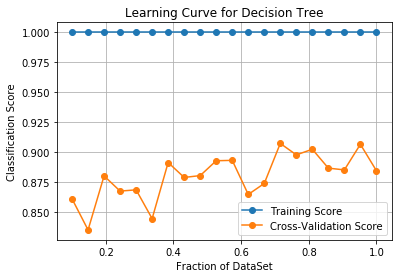

In [286]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

DecisionTreeScore = []
DT_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Decision Tree
    classifier, accuracy = DT_Classifier(X_train, X_test, y_train, y_test, random_state=0)
    DecisionTreeScore.append(accuracy)
    DT_classifier.append(classifier)
    print("Decision Tree Score: ", accuracy)
    print("\n")

index = DecisionTreeScore.index(max(DecisionTreeScore))
best_classifier = DT_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Decision Tree")

#### Hyperparameter Tuning

In [312]:
from sklearn.tree import DecisionTreeClassifier
import time

alpha = np.linspace(1e-3, 1e-2, 100)

parameters = [{'criterion': ['gini', 'entropy'], 
               'splitter': ['best', 'random'], 
               'min_samples_split': [2, 3, 4, 5], 
               'min_samples_leaf': [1, 2, 3, 4], 
               'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2]}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(DecisionTreeClassifier(max_depth=5, ccp_alpha=0.02), parameters, 'f1', cv=5)
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  11.321006059646606
{'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


#### Validation Curve

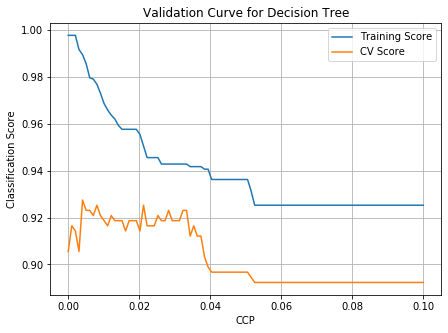

In [310]:
parameter = 'ccp_alpha'
parameter_range = np.linspace(0.0, 0.1, 100)
plot_validation_curve(DecisionTreeClassifier(max_depth=7),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='Decision Tree', attribute='CCP')

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Tuned Decision Tree Score:  94.5054945054945


----------------------------------------------------------------------------------------
Iteration Number:  2
Tuned Decision Tree Score:  86.81318681318682


----------------------------------------------------------------------------------------
Iteration Number:  3
Tuned Decision Tree Score:  92.3076923076923


----------------------------------------------------------------------------------------
Iteration Number:  4
Tuned Decision Tree Score:  92.3076923076923


----------------------------------------------------------------------------------------
Iteration Number:  5
Tuned Decision Tree Score:  93.4065934065934


Average Scores: 
Tuned Decision Tree Average Score:  91.86813186813187


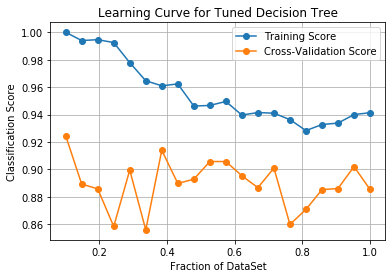

In [321]:
## Retest

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

DecisionTreeScore = []
DT_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    

    ## Decision Tree
    classifier, accuracy = DTClassifier(X_train, X_test, y_train, y_test, max_depth=5, 
                                        max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, 
                                        splitter='best', ccp=0.02)
    DecisionTreeScore.append(accuracy)
    DT_classifier.append(classifier)
    print("Tuned Decision Tree Score: ", accuracy)
    print("\n")
    
    i += 1

print("Average Scores: ")
print("Tuned Decision Tree Average Score: ", sum(DecisionTreeScore)/len(DecisionTreeScore))
    
index = DecisionTreeScore.index(max(DecisionTreeScore))
best_classifier = DT_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Tuned Decision Tree")
Final_DT_Classifier = best_classifier

### Neural Network

In [317]:
from sklearn.neural_network import MLPClassifier

def ANN_Tuned(X_train, X_test, y_train, y_test, solver, alpha, hidden_layer_sizes):
    classifier = MLPClassifier(solver=solver, alpha=alpha, 
                               hidden_layer_sizes=hidden_layer_sizes, random_state=0, max_iter=5000)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    return classifier, score

In [323]:
from sklearn.neural_network import MLPClassifier

def ANN(X_train, X_test, y_train, y_test):
    classifier = MLPClassifier(random_state=0, max_iter=5000)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    return classifier, score

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 43                 12
is_healthy                 0                 36
Neural Network Score:  0.8571428571428571


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 51                 10
is_healthy                 1                 29
Neural Network Score:  0.8405797101449275


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 55                  6
is_healthy                 1                 29
Neural Network Score:  0.8923076923076922


-------------------------------------------------

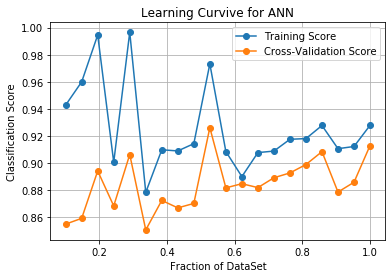

In [328]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    classifier, accuracy = ANN(X_train, X_test, y_train, y_test)
    NeuralNetworkScore.append(accuracy)
    NN_classifier.append(classifier)
    print("Neural Network Score: ", accuracy)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))



## Plot Learning Curve

index = NeuralNetworkScore.index(max(NeuralNetworkScore))
best_classifier = NN_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curvive for ANN")
NN_Final_Classifier = best_classifier

#### Hyperparameter Tuning

In [336]:
from sklearn.model_selection import GridSearchCV
import time

alpha = np.linspace(1e-4, 0.2, 20)

parameters = [{'alpha': alpha}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(MLPClassifier(alpha=0.17, max_iter=5000), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  106.77266001701355
{'alpha': 0.16843684210526316}


#### Validation Curve

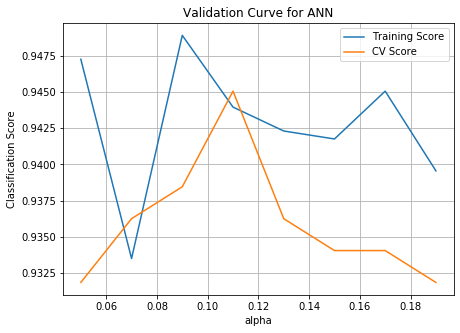

In [337]:
parameter = 'learning_rate'
parameter_range = [0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19]
plot_validation_curve(MLPClassifier(max_iter=5000),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='ANN', attribute="alpha")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 44                 11
is_healthy                 0                 36
Neural Network Score:  0.8674698795180723


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 50                 11
is_healthy                 1                 29
Neural Network Score:  0.8285714285714285


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 54                  7
is_healthy                 1                 29
Neural Network Score:  0.8787878787878789


-------------------------------------------------

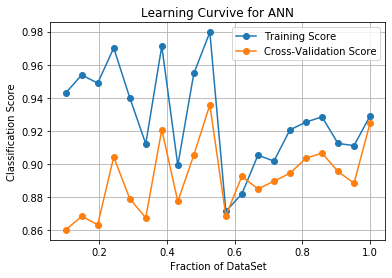

In [344]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    classifier, accuracy = ANN_Tuned(X_train, X_test, y_train, y_test, solver='adam', 
                                     alpha=0.11, hidden_layer_sizes=(100,))
    NeuralNetworkScore.append(accuracy)
    NN_classifier.append(classifier)
    print("Neural Network Score: ", accuracy)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))



## Plot Learning Curve

index = NeuralNetworkScore.index(max(NeuralNetworkScore))
best_classifier = NN_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curvive for ANN")
final_nn_classifier = best_classifier

### Boosting

In [221]:
from sklearn.ensemble import AdaBoostClassifier

def Boosting(X_train, X_test, y_train_, y_test):
    classifier = AdaBoostClassifier(random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    
    return classifier, score

In [239]:
from sklearn.ensemble import AdaBoostClassifier

def Boosting_tuned(X_train, X_test, y_train, y_test, n, learning_rate):
    classifier = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n, random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    

    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
        
    return classifier, score

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 42                 13
is_healthy                 0                 36
Boosting Score:  0.8470588235294119


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 46                 15
is_healthy                 0                 30
Boosting Score:  0.8


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 50                 11
is_healthy                 3                 27
Boosting Score:  0.7941176470588235


----------------------------------------------------------------------------------

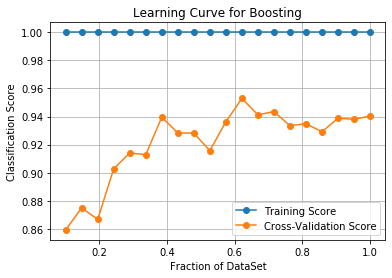

In [222]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

BoostingScore = []
BoostingClassifier = []
i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Boosting
    classifier, accuracy = Boosting(X_train, X_test, y_train, y_test)
    BoostingScore.append(accuracy)
    BoostingClassifier.append(classifier)
    print("Boosting Score: ", accuracy)
    print("\n")
    

    i += 1
    

print("Boosting Score: ", sum(BoostingScore)/len(BoostingScore))

index = BoostingScore.index(max(BoostingScore))
best_classifier = BoostingClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Boosting")

#### Hyperparameter Tuning

In [249]:
from sklearn.model_selection import GridSearchCV
import time

n_estimators = [200]
learning_rate = [0.2, 0.4, 0.6, 0.8, 1.0]

parameters = [{'n_estimators': n_estimators, 
               'learning_rate': learning_rate}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(AdaBoostClassifier(), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  18.395984172821045
{'learning_rate': 0.2, 'n_estimators': 200}


#### Validation Curve

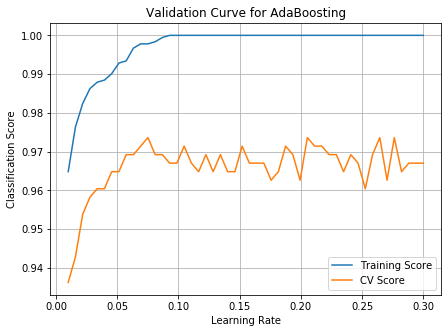

In [250]:
parameter = 'learning_rate'
parameter_range = np.linspace(0.01, 0.3, 50)
plot_validation_curve(AdaBoostClassifier(n_estimators=200),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='AdaBoosting', attribute="Learning Rate")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 42                 13
is_healthy                 0                 36
Boosting Score:  0.8470588235294119


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 50                 11
is_healthy                 0                 30
Boosting Score:  0.8450704225352113


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 54                  7
is_healthy                 3                 27
Boosting Score:  0.84375


------------------------------------------------------------------------------

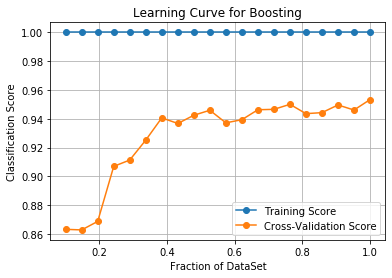

In [343]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

BoostingScore = []
BoostingClassifier = []
i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Boosting
    classifier, accuracy = Boosting_tuned(X_train, X_test, y_train, y_test, n=200, learning_rate=0.2)
    BoostingScore.append(accuracy)
    BoostingClassifier.append(classifier)
    print("Boosting Score: ", accuracy)
    print("\n")
    

    i += 1
    

print("Boosting Score: ", sum(BoostingScore)/len(BoostingScore))

index = BoostingScore.index(max(BoostingScore))
best_classifier = BoostingClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Boosting")

final_boosting_classifier = best_classifier

### Support Vector Machine

In [175]:
from sklearn import svm

def SupportVectorMachine(X_train, X_test, y_train, y_test, kernel):
    
    # Kernel 1
    classifier = svm.SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    
    return classifier, accuracy

In [176]:
## Tuned

def SVM_Tuned(X_train, X_test, y_train, y_test, C, kernel, degree, gamma):
    
    classifier = svm.SVC(kernel=kernel, random_state=0, C=C, degree=degree, gamma=gamma)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    return classifier, accuracy

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 55                  0
is_healthy                 7                 29
SVM Score:  92.3076923076923


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 59                  2
is_healthy                 9                 21
SVM Score:  87.91208791208791


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 61                  0
is_healthy                 6                 24
SVM Score:  93.4065934065934


---------------------------------------------------------------------------------------

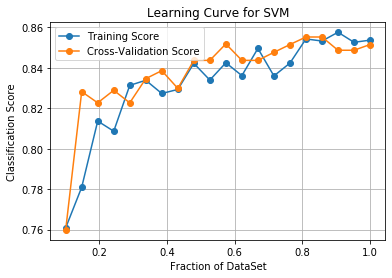

In [177]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)


SVMScore = []
SVMClassifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    ## Support Vector Machine
    classifier, accuracy = SupportVectorMachine(X_train, X_test, y_train, y_test,
                                              kernel='rbf')
    SVMScore.append(accuracy)
    SVMClassifier.append(classifier)
    print("SVM Score: ", accuracy)
    print("\n")
    
    i +=1 
    
print("Average Scores: ")
print("SVM Linear Score: ", sum(SVMScore)/len(SVMScore))

## Plot Learning Curve
index = SVMScore.index(max(SVMScore))
best_classifier = SVMClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for SVM")

#### Hyperparameter Tuning

In [224]:
from sklearn.model_selection import GridSearchCV
import time

C = [C]
gamma = np.linspace(1e-5, 1e-1, 50)

parameters = [{'kernel': ['rbf'], 
               'C': C, 
               'gamma': gamma}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(svm.SVC(), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:


/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: 

/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: 

/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: must be real number, not list

  FitFailedWarning)
/Users/anandsongvit/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: 

TypeError: must be real number, not list

#### Validation Curve

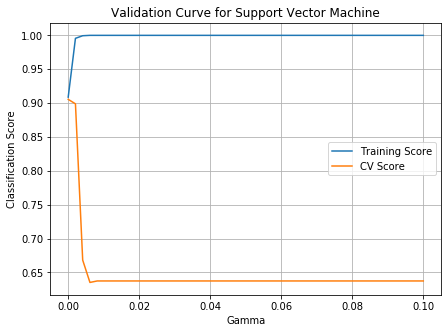

In [125]:
parameter = 'gamma'
parameter_range = np.linspace(1e-6, 1e-1, 50)
plot_validation_curve(svm.SVC(kernel='rbf', C=0.79),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='Support Vector Machine', attribute="Gamma")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 51                  4
is_healthy                 1                 35
SVM Score:  94.5054945054945


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 58                  3
is_healthy                 3                 27
SVM Score:  93.4065934065934


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 60                  1
is_healthy                 6                 24
SVM Score:  92.3076923076923


----------------------------------------------------------------------------------------

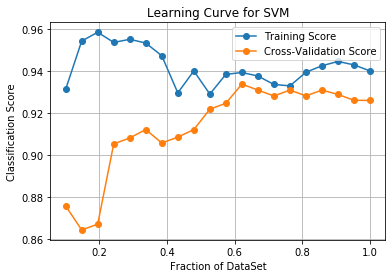

In [342]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)


SVMScore = []
SVMClassifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    ## Support Vector Machine
    classifier, accuracy = SVM_Tuned(X_train, X_test, y_train, y_test,
                                              kernel='linear', C=0.0029, gamma='scale', degree=3)
    SVMScore.append(accuracy)
    SVMClassifier.append(classifier)
    print("SVM Score: ", accuracy)
    print("\n")
    
    i +=1 
    
print("Average Scores: ")
print("SVM Linear Score: ", sum(SVMScore)/len(SVMScore))




## Plot Learning Curve
index = SVMScore.index(max(SVMScore))
best_classifier = SVMClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for SVM")
final_svm_classifier = best_classifier

### kNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

def kNN(X_train, X_test, y_train, y_test):
    
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    

    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
        
    return classifier, score

In [190]:
def kNN_Tuned(X_train, X_test, y_train, y_test, k, p):
    
    classifier = KNeighborsClassifier(n_neighbors=k, p=p)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    
    return classifier, accuracy

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 54                  1
is_healthy                 0                 36
kNN Score:  0.9863013698630138


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 57                  4
is_healthy                 0                 30
kNN Score:  0.9375


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 52                  9
is_healthy                 2                 28
kNN Score:  0.835820895522388


----------------------------------------------------------------------------------------
Iterat

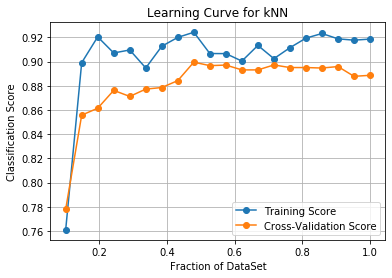

In [181]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

kNNScore = []
kNNClassifier = []
i = 1


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
#     y_train = y_train.apply(lambda q: 0 if q == B else 1)
#     y_test = y_test.apply(lambda q: 0 if q == B else 1)
    
    
    ## K-Nearest Neighbors
    classifier, score = kNN(X_train, X_test, y_train, y_test)
    kNNScore.append(score)
    kNNClassifier.append(classifier)
    print("kNN Score: ", score)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("kNN Score: ", sum(kNNScore)/len(kNNScore))


index = kNNScore.index(max(kNNScore))
best_classifier = kNNClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for kNN")

#### Hyperparameter Tuning

In [185]:
def kNN_Tuned(X_train, X_test, y_train, y_test, k, p):
    
    classifier = KNeighborsClassifier(k=k, p=p)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy.score(y_test, y_predicted) * 100
    
    return classifier, accuracy

In [204]:
from sklearn.model_selection import GridSearchCV
import time

k = [7, 8, 9, 10, 11, 12, 13, 14, 15]
p = [1.0, 2.0, 3.0]

parameters = [{'n_neighbors': k,
               'p': p}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(KNeighborsClassifier(), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  1.5843300819396973
{'n_neighbors': 7, 'p': 2.0}


#### Validation Curve

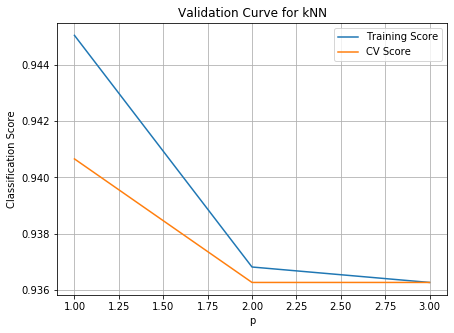

In [214]:
parameter = 'p'
parameter_range = [1.0, 2.0, 3.0]
plot_validation_curve(KNeighborsClassifier(n_neighbors=9),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='kNN', attribute="p")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 54                  1
is_healthy                 0                 36
kNN Score:  0.9714285714285714


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 55                  6
is_healthy                 0                 30
kNN Score:  0.9714285714285714


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 53                  8
is_healthy                 3                 27
kNN Score:  0.9714285714285714


----------------------------------------------------------------------------------

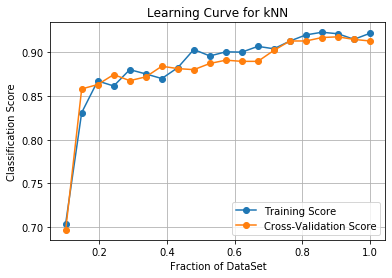

In [349]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

kNNScore = []
kNNClassifier = []
i = 1


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
#     y_train = y_train.apply(lambda q: 0 if q == B else 1)
#     y_test = y_test.apply(lambda q: 0 if q == B else 1)
    
    
    ## K-Nearest Neighbors
    classifier, score = kNN_Tuned(X_train, X_test, y_train, y_test, k=9, p=1.0)
    kNNScore.append(score)
    kNNClassifier.append(classifier)
    print("kNN Score: ", score)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("kNN Score: ", sum(kNNScore)/len(kNNScore))


index = kNNScore.index(max(kNNScore))
best_classifier = kNNClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for kNN")
final_knn_classifier = best_classifier

# Final Test on Testing Set

In [350]:
# Final_DT_Classifier
# final_knn_classifier
# final_svm_classifier
# final_boosting_classifier
# final_ann_classifier

# X_real_test
# y_real_test

DT_predicted = Final_DT_Classifier.predict(X_real_test)
DT_score = metrics.f1_score(DT_predicted, y_real_test)

print("Decision Tree Score: ", DT_score)

ANN_predicted = final_nn_classifier.predict(X_real_test)
ANN_score = metrics.f1_score(ANN_predicted, y_real_test)

print("ANN Score: ", ANN_score)

Boosting_predicted = final_boosting_classifier.predict(X_real_test)
Boosting_score = metrics.f1_score(Boosting_predicted, y_real_test)

print("Boosting Score: ", Boosting_score)

SVM_predicted = final_svm_classifier.predict(X_real_test)
SVM_score = metrics.f1_score(SVM_predicted, y_real_test)

print("SVM Score: ", SVM_score)

KNN_predicted = final_knn_classifier.predict(X_real_test)
KNN_score = metrics.f1_score(KNN_predicted, y_real_test)

print("KNN Score: ", KNN_score)

Decision Tree Score:  0.9574468085106385
ANN Score:  0.5838509316770186
Boosting Score:  0.5838509316770186
SVM Score:  0.9166666666666666
KNN Score:  0.5838509316770186
